# Example Notebook for exploring ERA5 global reanalysis daily data 75 years (1950-2025) Netherlands

Use of ERA5 data is free of charge, worldwide, non-exclusive, royalty-free and perpetual.\
All users of Copernicus Data and Products must provide clear and visible attribution to the Copernicus program.\
Neither the European Commission nor ECMWF is responsible for any use that may be made of the Copernicus information or data it contains.

In [1]:
%pip install beacon-api --upgrade
from beacon_api import * # Import the Beacon API client

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\robin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Connect to the Beacon API instance for ERA5 data.

In [2]:
client = Client("https://beacon-era5.maris.nl")

Connected to: https://beacon-era5.maris.nl/ server successfully
Beacon Version: 1.5.2


Get the daily single levels collection

In [3]:
daily_single_levels_collections = client.list_tables()['daily_single_levels']

In [4]:
available_columns = daily_single_levels_collections.get_table_schema()
list(available_columns)[:50] # Display first 50 available columns

[pyarrow.Field<latitude.units: string>,
 pyarrow.Field<latitude.standard_name: string>,
 pyarrow.Field<latitude.long_name: string>,
 pyarrow.Field<latitude.stored_direction: string>,
 pyarrow.Field<latitude: double>,
 pyarrow.Field<longitude.units: string>,
 pyarrow.Field<longitude.standard_name: string>,
 pyarrow.Field<longitude.long_name: string>,
 pyarrow.Field<longitude: double>,
 pyarrow.Field<msl.GRIB_paramId: double>,
 pyarrow.Field<msl.GRIB_dataType: string>,
 pyarrow.Field<msl.GRIB_numberOfPoints: double>,
 pyarrow.Field<msl.GRIB_typeOfLevel: string>,
 pyarrow.Field<msl.GRIB_stepUnits: double>,
 pyarrow.Field<msl.GRIB_stepType: string>,
 pyarrow.Field<msl.GRIB_gridType: string>,
 pyarrow.Field<msl.GRIB_uvRelativeToGrid: double>,
 pyarrow.Field<msl.GRIB_NV: double>,
 pyarrow.Field<msl.GRIB_Nx: double>,
 pyarrow.Field<msl.GRIB_Ny: double>,
 pyarrow.Field<msl.GRIB_cfName: string>,
 pyarrow.Field<msl.GRIB_cfVarName: string>,
 pyarrow.Field<msl.GRIB_gridDefinitionDescription: strin

In [7]:
# Here we build the query step by step. First we select the columns we want to retrieve, then we add the filters and finally we specify the output format.
query_builder = daily_single_levels_collections.query()

query_builder.add_select_column("longitude") 
query_builder.add_select_column("latitude") 
query_builder.add_select_column("valid_time")
query_builder.add_select_column("t2m") # Other variables are available, you can check the list of available columns above and select the ones you are interested in.

## Add the filters
query_builder.add_range_filter("valid_time", "1950-01-01T00:00:00", "2025-01-01T00:00:00")  # You can adjust the date range as needed. The format is ISO 8601.
query_builder.add_range_filter("longitude", 3, 7.5)  # Longitude range
query_builder.add_range_filter("latitude", 50.5, 54)  # Latitude range

df = query_builder.to_pandas_dataframe()
df

Creating JSONQuery with from: FromTable(table='daily_single_levels')
Running query: {"output": {"format": "parquet"}, "select": [{"column": "longitude", "alias": null}, {"column": "latitude", "alias": null}, {"column": "valid_time", "alias": null}, {"column": "t2m", "alias": null}], "filters": [{"column": "valid_time", "gt_eq": "1950-01-01T00:00:00", "lt_eq": "2025-01-01T00:00:00"}, {"column": "longitude", "gt_eq": 3, "lt_eq": 7.5}, {"column": "latitude", "gt_eq": 50.5, "lt_eq": 54}], "distinct": null, "sort_by": null, "limit": null, "offset": null, "from": "daily_single_levels"}


,longitude,latitude,valid_time,t2m
0,3.00,54.0,1969-01-01,280.427643
1,3.25,54.0,1969-01-01,280.452209
2,3.50,54.0,1969-01-01,280.456116
3,3.75,54.0,1969-01-01,280.451141
4,4.00,54.0,1969-01-01,280.498260
...,...,...,...,...
7807570,6.50,50.5,1988-12-31,275.702393
7807571,6.75,50.5,1988-12-31,276.043610
7807572,7.00,50.5,1988-12-31,276.547607
7807573,7.25,50.5,1988-12-31,276.452148


It is also possible to get it as an xarray dataset, which is more convenient for working with gridded data. You can use the `to_xarray_dataset()` method instead of `to_pandas_dataframe()`.

In [8]:
# Here we build the query step by step. First we select the columns we want to retrieve, then we add the filters and finally we specify the output format.
query_builder = daily_single_levels_collections.query()

query_builder.add_select_column("longitude") 
query_builder.add_select_column("latitude") 
query_builder.add_select_column("valid_time")
query_builder.add_select_column("t2m") # Other variables are available, you can check the list of available columns above and select the ones you are interested in.

## Add the filters
query_builder.add_range_filter("valid_time", "1950-01-01T00:00:00", "2025-01-01T00:00:00")  # You can adjust the date range as needed. The format is ISO 8601.
query_builder.add_range_filter("longitude", 3, 7.5)  # Longitude range
query_builder.add_range_filter("latitude", 50.5, 54)  # Latitude range

ds = query_builder.to_xarray_dataset(dimension_columns=["valid_time", "latitude", "longitude"])
ds

Creating JSONQuery with from: FromTable(table='daily_single_levels')
Running query: {"output": {"format": {"nd_netcdf": {"dimension_columns": ["valid_time", "latitude", "longitude"]}}}, "select": [{"column": "longitude", "alias": null}, {"column": "latitude", "alias": null}, {"column": "valid_time", "alias": null}, {"column": "t2m", "alias": null}], "filters": [{"column": "valid_time", "gt_eq": "1950-01-01T00:00:00", "lt_eq": "2025-01-01T00:00:00"}, {"column": "longitude", "gt_eq": 3, "lt_eq": 7.5}, {"column": "latitude", "gt_eq": 50.5, "lt_eq": 54}], "distinct": null, "sort_by": null, "limit": null, "offset": null, "from": "daily_single_levels"}


<xarray.Dataset> Size: 31MB
Dimensions:     (valid_time: 27395, latitude: 15, longitude: 19)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 219kB 1950-01-01 ... 2025-01-01
  * latitude    (latitude) float64 120B 50.5 50.75 51.0 ... 53.5 53.75 54.0
  * longitude   (longitude) float64 152B 3.0 3.25 3.5 3.75 ... 6.75 7.0 7.25 7.5
Data variables:
    t2m         (valid_time, latitude, longitude) float32 31MB ...

C:\Users\robin\AppData\Local\Temp\ipykernel_6972\2628382490.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['t2m']


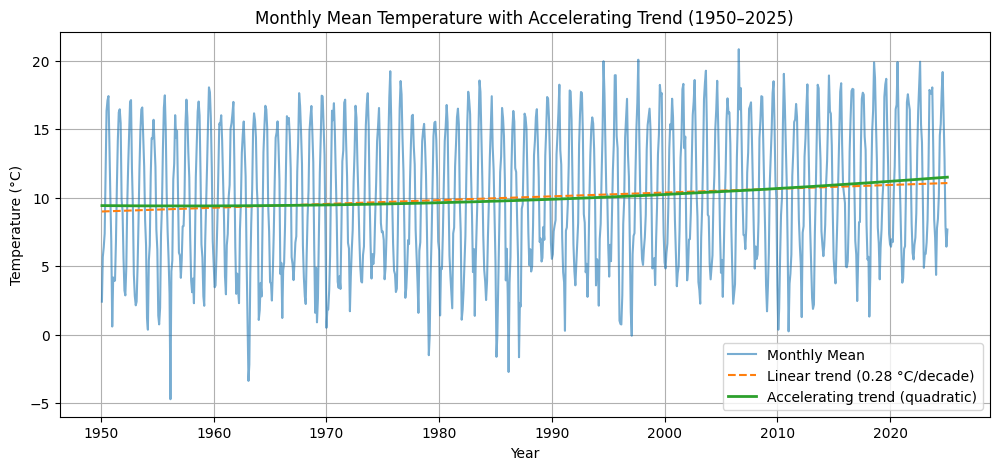

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df['t2m'] = df['t2m'] - 273.15  # Convert from Kelvin to Celsius

monthly_series = (
    df[df['valid_time'].dt.year >= 1950]
    .set_index('valid_time')
    .resample('M')['t2m']
    .mean()
    .reset_index()
)

x = np.arange(len(monthly_series))   # numeric index for regression
y = monthly_series['t2m']

# Linear trend
coef_lin = np.polyfit(x, y, 1)
trend_lin = np.poly1d(coef_lin)

# Quadratic trend (shows acceleration)
coef_quad = np.polyfit(x, y, 2)
trend_quad = np.poly1d(coef_quad)

plt.figure(figsize=(12, 5))
plt.plot(monthly_series['valid_time'], y, label='Monthly Mean', alpha=0.6)
plt.plot(monthly_series['valid_time'], trend_lin(x), '--',
         label=f'Linear trend ({coef_lin[0]*120:.2f} °C/decade)')
plt.plot(monthly_series['valid_time'], trend_quad(x),
         label='Accelerating trend (quadratic)', linewidth=2)

plt.title('Monthly Mean Temperature with Accelerating Trend (1950–2025)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

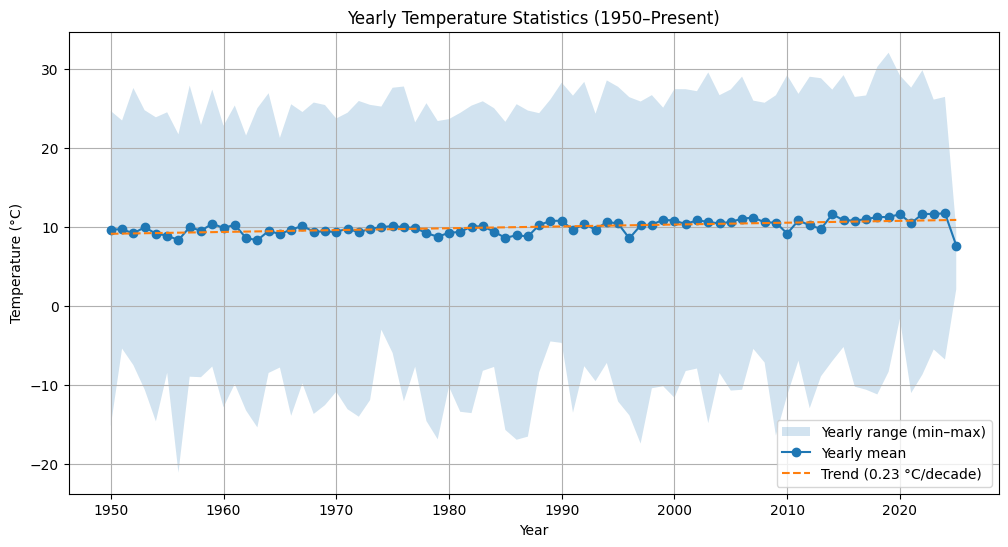

In [19]:
# Compute yearly statistics
yearly_stats = (
    df
    .groupby(df['valid_time'].dt.year)['t2m']
    .agg(['mean', 'min', 'max'])
    .reset_index()
)

yearly_stats.columns = ['YEAR', 'MEAN_TEMP', 'MIN_TEMP', 'MAX_TEMP']

x = yearly_stats['YEAR']
y = yearly_stats['MEAN_TEMP']

# Linear trend on yearly mean
coef = np.polyfit(x, y, 1)
trend = np.poly1d(coef)

plt.figure(figsize=(12, 6))

# Min–max range as shaded band
plt.fill_between(
    yearly_stats['YEAR'],
    yearly_stats['MIN_TEMP'],
    yearly_stats['MAX_TEMP'],
    alpha=0.2,
    label='Yearly range (min–max)'
)

# Mean line
plt.plot(yearly_stats['YEAR'], yearly_stats['MEAN_TEMP'],
         marker='o', label='Yearly mean')

# Trendline
plt.plot(yearly_stats['YEAR'], trend(x),
         linestyle='--',
         label=f'Trend ({coef[0]*10:.2f} °C/decade)')

plt.title('Yearly Temperature Statistics (1950–Present)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()